In [0]:
df = spark.table("workspace.default.patent_battery_material_recyclability")
df.limit(100).display()

publication_number,family_id,publication_date,material_name,material_recycle_score,material_recycle_score_reason,patent_recycle_score,patent_recycle_score_reason
US-2023084047-A1,7.8331911E7,2023-03-16T00:00:00.000,LiSO3F,8,"LiSO3F is a lithium salt that can be recycled through various methods, including solvent extraction and precipitation. However, the recycling process may require additional steps to separate the lithium from other components.",0,The patent does not mention any specific recycling methods for LiSO3F.
US-2023084047-A1,7.8331911E7,2023-03-16T00:00:00.000,LiPO2F2,8,"LiPO2F2 is a lithium salt that can be recycled through various methods, including solvent extraction and precipitation. However, the recycling process may require additional steps to separate the lithium from other components.",0,The patent does not mention any specific recycling methods for LiPO2F2.
US-2023084047-A1,7.8331911E7,2023-03-16T00:00:00.000,Graphite,9,"Graphite is a highly recyclable material that can be reused in various applications, including batteries. The recycling process is relatively simple and well-established.",0,The patent does not mention any specific recycling methods for graphite.
US-2023084047-A1,7.8331911E7,2023-03-16T00:00:00.000,Sulfide solid electrolyte (Li2S—P2S5),6,"Sulfide solid electrolytes can be recycled through various methods, including solvent extraction and precipitation. However, the recycling process may require additional steps to separate the lithium from other components, and the sulfur content may pose challenges.",0,The patent does not mention any specific recycling methods for sulfide solid electrolytes.
US-2023084047-A1,7.8331911E7,2023-03-16T00:00:00.000,Lithium,9,"Lithium is a highly recyclable material that can be reused in various applications, including batteries. The recycling process is relatively simple and well-established.",0,The patent does not mention any specific recycling methods for lithium.
US-2023102360-A1,8.5721776E7,2023-03-30T00:00:00.000,Polyester-based resin,6,"Polyester-based resins are commonly recycled in the textile industry, but the process can be complex and expensive. However, new technologies and recycling methods are being developed to improve the recyclability of polyester-based resins.",0,The patent does not mention any specific recycling methods or procedures for polyester-based resins.
US-2023102360-A1,8.5721776E7,2023-03-30T00:00:00.000,Polyolefin-based resin,7,"Polyolefin-based resins are widely recycled in various industries, including packaging and automotive. The recycling process is relatively well-established, and the material can be recycled multiple times without significant loss of quality.",0,The patent does not mention any specific recycling methods or procedures for polyolefin-based resins.
US-2023102360-A1,8.5721776E7,2023-03-30T00:00:00.000,Polyamide-based resin,5,"Polyamide-based resins are recyclable, but the process can be more complex and expensive compared to other types of plastics. However, some companies are developing new recycling technologies to improve the recyclability of polyamide-based resins.",0,The patent does not mention any specific recycling methods or procedures for polyamide-based resins.
US-2023102360-A1,8.5721776E7,2023-03-30T00:00:00.000,Glass,9,"Glass is 100% recyclable and can be recycled endlessly without losing its quality. The recycling process is well-established, and glass is widely recycled in various industries.",0,The patent does not mention any specific recycling methods or procedures for glass.
US-2023102360-A1,8.5721776E7,2023-03-30T00:00:00.000,Sulfide solid electrolyte,3,"Sulfide solid electrolytes are relatively new materials, and their recyclability is still being researched and developed. Currently, there are limited recycling methods available for these materials.",0,The patent does not mention any specific recycling methods or procedures for sulfide solid electrolytes.


In [0]:
from pyspark.sql.functions import col, countDistinct

unique_counts = df.agg(*(countDistinct(col(c)).alias(c) for c in df.columns))
display(unique_counts)

publication_number,family_id,publication_date,material_name,material_recycle_score,material_recycle_score_reason,patent_recycle_score,patent_recycle_score_reason
233,227,34,1451,11,2642,10,1451


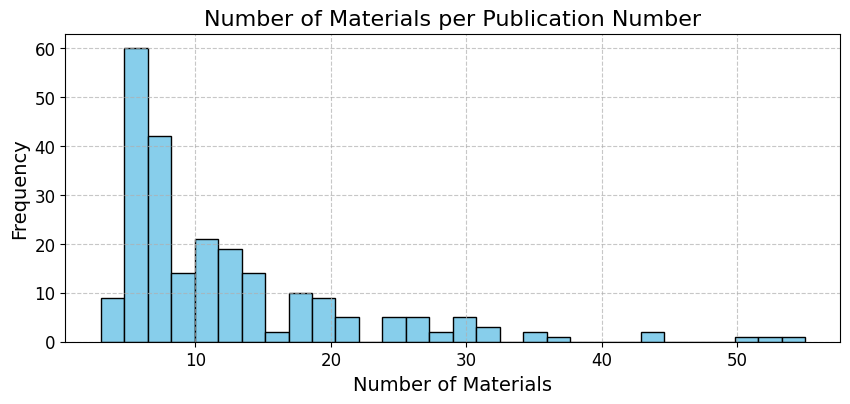

In [0]:
import matplotlib.pyplot as plt

# Group by publication number and count the number of rows per unique publication number
pub_num_counts = df.groupBy("publication_number").count()

# Collect the data to the driver for plotting
data = pub_num_counts.select("publication_number", "count").collect()

# Extract publication numbers and their counts
pub_nums = [row['publication_number'] for row in data]
counts = [row['count'] for row in data]

# Plot the histogram
plt.figure(figsize=(10, 4))
plt.hist(counts, bins=30, edgecolor='black', color='skyblue')
plt.title('Number of Materials per Publication Number', fontsize=16)
plt.xlabel('Number of Materials', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

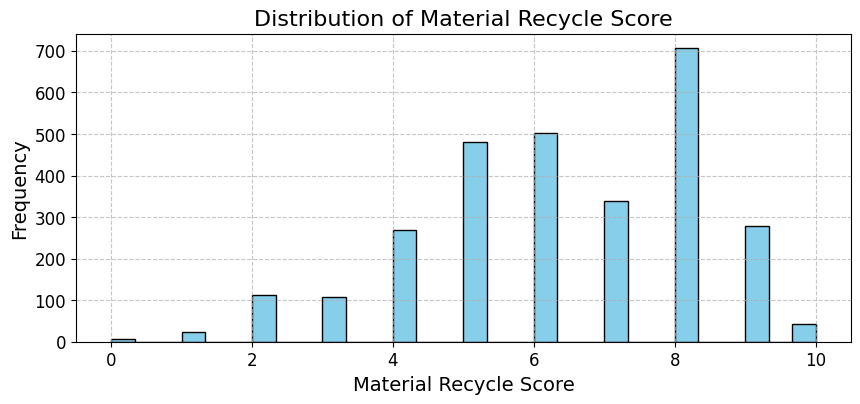

In [0]:
# Select the material_recycle_score column and collect the data to the driver for plotting
material_recycle_scores = df.select("material_recycle_score").collect()

# Extract the material_recycle_scores
scores = [row['material_recycle_score'] for row in material_recycle_scores]

# Plot the histogram
plt.figure(figsize=(10, 4))
plt.hist(scores, bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Material Recycle Score', fontsize=16)
plt.xlabel('Material Recycle Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [0]:
from pyspark.sql.functions import trunc

df = df.withColumn("yearmonth", trunc("publication_date", "month"))
df.limit(5).display()

publication_number,family_id,publication_date,material_name,material_recycle_score,material_recycle_score_reason,patent_recycle_score,patent_recycle_score_reason,yearmonth
US-2023084047-A1,7.8331911E7,2023-03-16T00:00:00.000,LiSO3F,8,"LiSO3F is a lithium salt that can be recycled through various methods, including solvent extraction and precipitation. However, the recycling process may require additional steps to separate the lithium from other components.",0,The patent does not mention any specific recycling methods for LiSO3F.,2023-03-01
US-2023084047-A1,7.8331911E7,2023-03-16T00:00:00.000,LiPO2F2,8,"LiPO2F2 is a lithium salt that can be recycled through various methods, including solvent extraction and precipitation. However, the recycling process may require additional steps to separate the lithium from other components.",0,The patent does not mention any specific recycling methods for LiPO2F2.,2023-03-01
US-2023084047-A1,7.8331911E7,2023-03-16T00:00:00.000,Graphite,9,"Graphite is a highly recyclable material that can be reused in various applications, including batteries. The recycling process is relatively simple and well-established.",0,The patent does not mention any specific recycling methods for graphite.,2023-03-01
US-2023084047-A1,7.8331911E7,2023-03-16T00:00:00.000,Sulfide solid electrolyte (Li2S—P2S5),6,"Sulfide solid electrolytes can be recycled through various methods, including solvent extraction and precipitation. However, the recycling process may require additional steps to separate the lithium from other components, and the sulfur content may pose challenges.",0,The patent does not mention any specific recycling methods for sulfide solid electrolytes.,2023-03-01
US-2023084047-A1,7.8331911E7,2023-03-16T00:00:00.000,Lithium,9,"Lithium is a highly recyclable material that can be reused in various applications, including batteries. The recycling process is relatively simple and well-established.",0,The patent does not mention any specific recycling methods for lithium.,2023-03-01


In [0]:
from pyspark.sql.functions import avg

df_grouped = df.groupBy("yearmonth").agg(avg("material_recycle_score").alias("avg_material_recycle_score"))
display(df_grouped)

yearmonth,avg_material_recycle_score
2022-03-01,6.633093525179856
2023-05-01,6.169847328244275
2023-03-01,6.249334516415262
2023-06-01,6.412621359223301


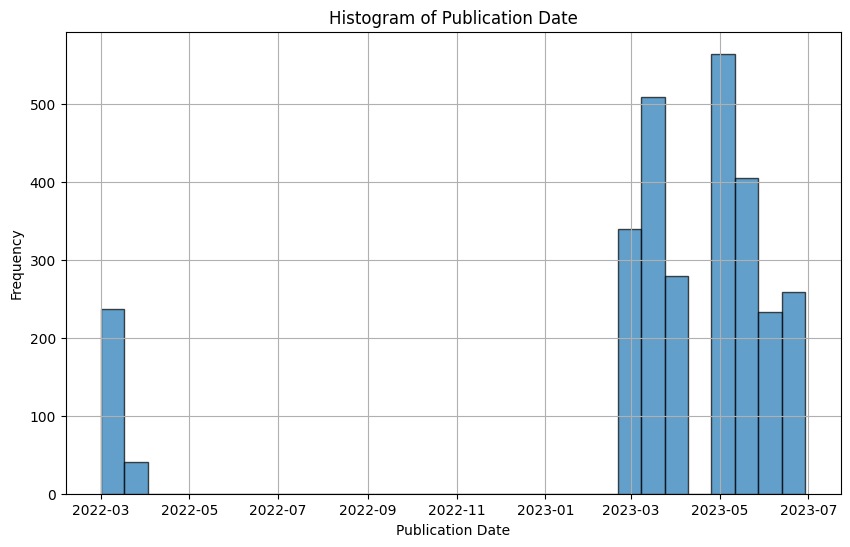

In [0]:
import matplotlib.pyplot as plt

# Convert publication_date to a pandas dataframe
pdf = df.select("publication_date").toPandas()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(pdf['publication_date'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Publication Date')
plt.ylabel('Frequency')
plt.title('Histogram of Publication Date')
plt.grid(True)
plt.show()

In [0]:
df_count = df.groupBy("yearmonth").agg(count("*").alias("count"))
df_count.display()

yearmonth,count
2022-03-01,278
2023-05-01,1048
2023-03-01,1127
2023-06-01,412
